In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("election2024 (1).csv")
df.head(5)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [4]:
df.shape
### Missing values present in two features more than 30 %age so we will drop these two features

(1600, 16)

In [5]:
df.drop("company_type", axis= 1, inplace= True)

In [6]:
df.drop("job_type", axis= 1, inplace= True)

In [7]:
categorical_data = [col for col in df.columns if df[col].dtype == "object"]
numerical_data = [col for col in df.columns if df[col].dtype != "object"]

In [8]:
for col in categorical_data:
    print("Unique categories in",col,"is: ", df[col].unique())
    print("-------------------------------------------")

Unique categories in id is:  ['07169ed8148ce047' '0716a4f3354cecdd' '0716889b304ce79c' ...
 '071690f34d4ce164' '0716bfa9c48ce79a' '07168088318cef88']
-------------------------------------------
Unique categories in sex is:  ['male' 'female']
-------------------------------------------
Unique categories in federal_district is:  ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']
-------------------------------------------
Unique categories in type_of_city is:  ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']
-------------------------------------------
Unique categories in knows_election_date is:  ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']
-------------------------------------------
Unique categories in will_vote is:  ['not sure' 'defin

In [9]:
df1 = df.drop("id", axis= 1)

In [10]:
df1.head()

## Weight1 represents here weighted analysis

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [11]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [12]:
### Now will check sex vote %age

df1.describe(include= "object")

,sex,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment
count,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600
unique,2,8,7,4,6,7,6,6,6,6,11
top,female,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire
freq,843,425,391,1361,1062,1128,490,613,690,949,535


In [13]:
df.groupby("sex")['will_vote'].value_counts()

sex     will_vote         
female  definitely yes        603
        likely yes            114
        not sure               63
        definitely no          33
        likely no              27
        struggle to answer      3
male    definitely yes        459
        likely yes            104
        not sure              103
        definitely no          53
        likely no              28
        struggle to answer     10
Name: count, dtype: int64

In [14]:
f1 = df['sex'] 
f2 = df['will_vote']
cross_table = pd.crosstab(f1, f2)
cross_table

### Females and males are equal as proportion of votes tell us female_votes > male_votes

will_vote,definitely no,definitely yes,likely no,likely yes,not sure,struggle to answer
sex,,,,,,
female,33,603,27,114,63,3
male,53,459,28,104,103,10


<Axes: xlabel='sex'>

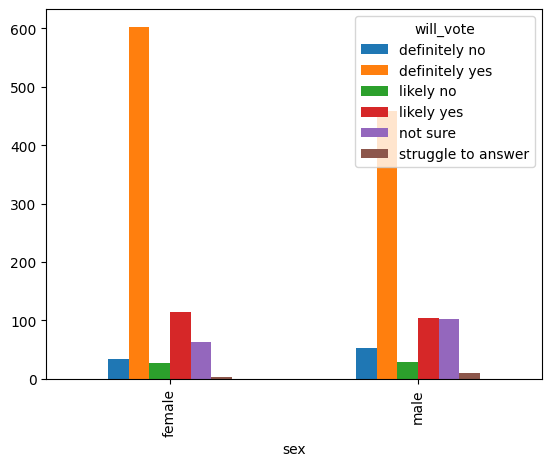

In [15]:
cross_table.plot(kind= 'bar')

In [16]:
df.groupby(['sex', 'will_vote', "candidate"]).agg({"candidate": ['count']})

candidate
                                                 count
sex    will_vote          candidate                   
female definitely no      Davankov                   1
                          Kharitonov                 1
                          Putin                     13
                          Slutskiy                   1
                          struggle to answer         1
...                                                ...
male   not sure           will not take part         4
       struggle to answer Davankov                   1
                          Kharitonov                 2
                          Putin                      5
                          struggle to answer         2

[68 rows x 1 columns]

In [17]:
## Now we will select who is more ellgible candidate... it comes through education as educated person will lead to good choice

df.groupby(['education', 'candidate']).agg({"will_vote": ['count']})

### clearly putin in all cases win by big margin.

will_vote
                                                   count
education                   candidate                   
academic degree             Davankov                   6
                            Kharitonov                 7
                            Putin                     62
                            Slutskiy                   1
                            spoilt vote                4
                            struggle to answer        13
                            will not take part         2
bachelor degree             Davankov                  35
                            Kharitonov                23
                            Putin                    355
                            Slutskiy                  22
                            spoilt vote               15
                            struggle to answer        66
                            will not take part        34
college                     Davankov                  19
                            Kharitonov                22
                            Putin                    521
                            Slutskiy                  23
                            spoilt vote                6
                            struggle to answer        56
                            will not take part        43
incomplete school education Davankov                   2
                            Kharitonov                 3
                            Putin                     61
                            Slutskiy                   4
                            struggle to answer         6
                            will not take part         4
no school education         Kharitonov                 1
                            struggle to answer         2
                            will not take part         1
school                      Davankov                   5
                            Kharitonov                 7
                            Putin                    129
                            Slutskiy                   5
                            spoilt vote                2
                            struggle to answer        21
                            will not take part        12

In [18]:
## How many males or females vote to which candidate and their educational qualification
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.groupby(['sex', 'candidate']).agg({"will_vote": ['count']})

## again putin win by big margin. 

will_vote
                              count
sex    candidate                   
female Davankov                  36
       Kharitonov                26
       Putin                    635
       Slutskiy                  25
       spoilt vote               15
       struggle to answer        73
       will not take part        33
male   Davankov                  31
       Kharitonov                37
       Putin                    493
       Slutskiy                  30
       spoilt vote               12
       struggle to answer        91
       will not take part        63

<Axes: xlabel='sex,education'>

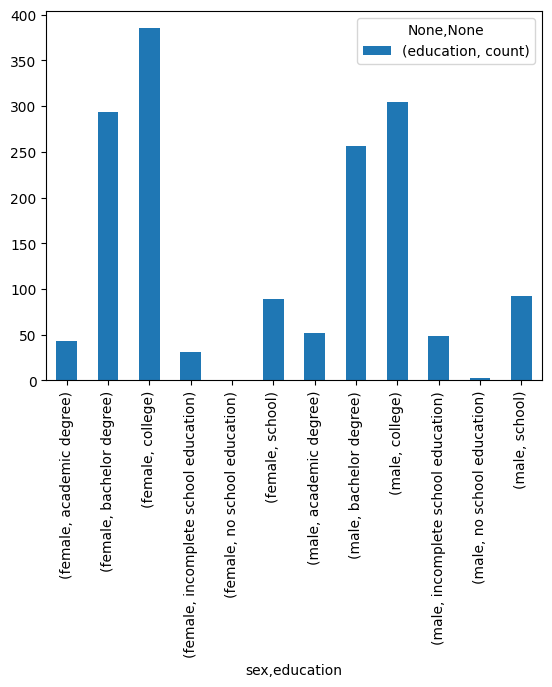

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sex_edu = df.groupby(['sex', 'education']).agg({"education": ['count']})

sex_edu.plot(kind= 'bar')

In [20]:
sex_edu

### females are more educated than males but in some areas of country, there are more conservative thinking where school of male > school of female

education
                                       count
sex    education                            
female academic degree                    43
       bachelor degree                   294
       college                           385
       incomplete school education        31
       no school education                 1
       school                             89
male   academic degree                    52
       bachelor degree                   256
       college                           305
       incomplete school education        49
       no school education                 3
       school                             92